In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from PIL import Image #PIL means Pillow library, for image processing

In [4]:
# Loading and resizing the image
image = Image.open('image1.jpg')
image = image.resize((image.width // 2, image.height // 2))  # Resize by half
image_np = np.array(image)
pixels = image_np.reshape(-1, 3)  #Reshaping the image to a 2D array of pixels

In [5]:
k_values = [8, 16, 32]
compressed_images = []

for k in k_values:
  kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
  kmeans.fit(pixels)

  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  compressed_image = centroids[labels].reshape(image_np.shape).astype(np.uint8)
  compressed_images.append(compressed_image)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


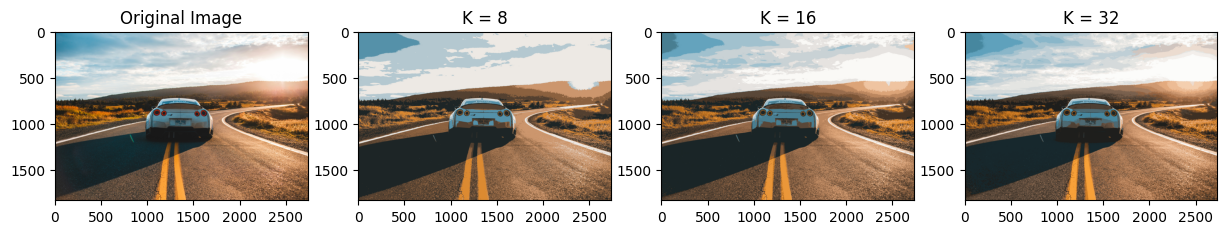

In [6]:
# Display the original and compressed images
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))
axes[0].imshow(image_np)
axes[0].set_title('Original Image')

for i, k in enumerate(k_values):
  axes[i + 1].imshow(compressed_images[i])
  axes[i + 1].set_title(f'K = {k}')

plt.show()